<a href="https://colab.research.google.com/github/neeluvermaiitj/Dependable-AI/blob/main/Dependable_AI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resouces
https://github.com/bethgelab/foolbox/blob/master/examples/multiple_attacks_pytorch_resnet18.py

https://github.com/Trusted-AI/adversarial-robustness-toolbox/wiki/ART-Attacks

https://adversarial-robustness-toolbox.readthedocs.io/en/stable/modules/attacks/evasion.html#decision-tree-attack



# Experiment with D-10 dataset

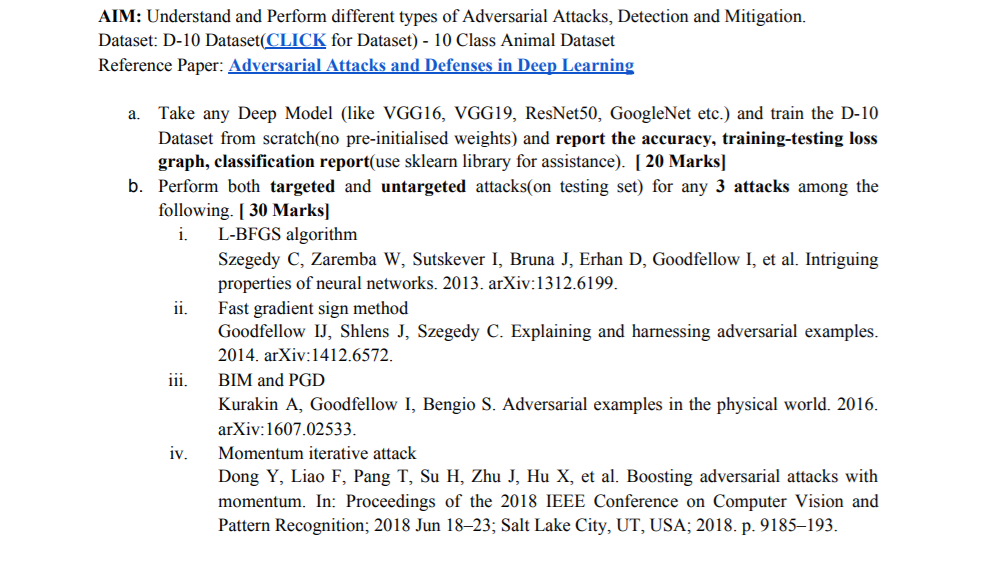

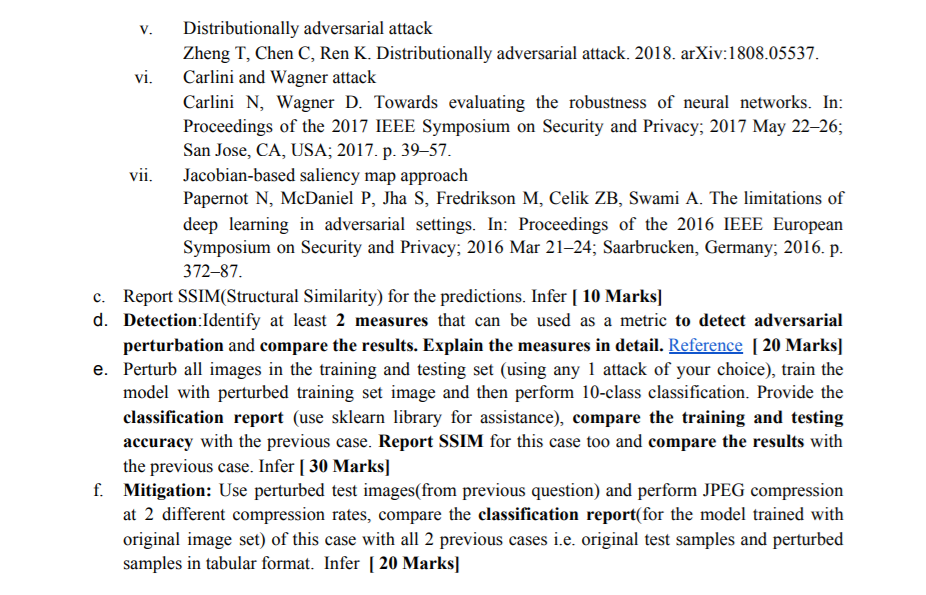

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
directory = r'/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/Images/'
images = []
labels = []
labels_name = []

cnt = 0
for foldername in os.listdir(directory):
    for filename in os.listdir(directory + foldername):
        labels_np = np.zeros(10)
        ext=[".jpg",".jpeg"] 
        if filename.endswith(tuple(ext)):
            img = cv2.imread(os.path.join(directory,foldername, filename))
            if img is not None:
                resized_im = cv2.resize(img, (64, 64))
                images.append(resized_im)
                labels_np[cnt] = 1
                labels.append(labels_np)
    cnt +=1
    labels_name.append(foldername)

In [ ]:
images = np.asarray(images)
images.shape

(26128, 64, 64, 3)

In [ ]:
labels = np.asarray(labels)
labels.shape

(26128, 10)

In [ ]:
x_data = images.astype('float16')
x_data /= 255.

In [ ]:
import scipy.io as sio

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.3, random_state=20, stratify=labels)

In [ ]:
dataset_variable={"x_train": x_train, "y_train": y_train,"x_test":x_test,"y_test":y_test,"label":labels}

In [ ]:
sio.savemat('/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/data.mat',dataset_variable)

In [ ]:
data=sio.loadmat('/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/data.mat')

In [ ]:
x_train=data['x_train']
y_train=data['y_train']
x_test=data['x_test']
y_test=data['y_test']

In [ ]:
x_train.shape

(20902, 64, 64, 3)

In [ ]:
x_test.shape

(5226, 64, 64, 3)

In [ ]:
y_train.shape

(20902, 10)

In [ ]:
y_test.shape

(5226, 10)

# Model Implementation

# Experiment without hyperparameter optimization or tuning

In [ ]:
# Importing the required libraries
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [ ]:
# Initializing a Sequential model
def create_model():
 # Initializing a Sequential model
  model = Sequential()

  # Creating first block- (2 Convolution + 1 Max pool)
  model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', input_shape= (64, 64, 3), activation= 'relu'))
  model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

  # Creating second block- (2 Convolution + 1 Max pool)
  model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

  # Creating third block- (3 Convolution + 1 Max pool)
  model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

  # Creating fourth block- (3 Convolution + 1 Max pool)
  model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

  # Creating fifth block- (3 Convolution + 1 Max pool)
  model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
  model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

  # Flattening the pooled image pixels
  model.add(Flatten())

  # Creating 2 Dense Layers
  model.add(Dense(units= 4096, activation='relu'))
  model.add(Dense(units= 4096, activation='relu'))

  # Creating an output layer
  model.add(Dense(units= 10, activation='softmax'))
  return model
modelvgg16 = create_model()

In [ ]:
modelvgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)       2

In [ ]:
#opt = keras.optimizers.Adam(learning_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
modelvgg16.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
history10= modelvgg16.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
654/654 [==============================] - 31s 37ms/step - loss: 2.2247 - accuracy: 0.1838 - val_loss: 2.2161 - val_accuracy: 0.1936
Epoch 2/5
654/654 [==============================] - 22s 33ms/step - loss: 2.2100 - accuracy: 0.1861 - val_loss: 2.2150 - val_accuracy: 0.1936
Epoch 3/5
654/654 [==============================] - 22s 33ms/step - loss: 2.2047 - accuracy: 0.1896 - val_loss: 2.2143 - val_accuracy: 0.1720
Epoch 4/5
654/654 [==============================] - 22s 33ms/step - loss: 2.2076 - accuracy: 0.1881 - val_loss: 2.2142 - val_accuracy: 0.1720
Epoch 5/5
654/654 [==============================] - 22s 33ms/step - loss: 2.2096 - accuracy: 0.1835 - val_loss: 2.2144 - val_accuracy: 0.1720


In [ ]:
modelvgg16.save('/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/D101_new10_model.h5')

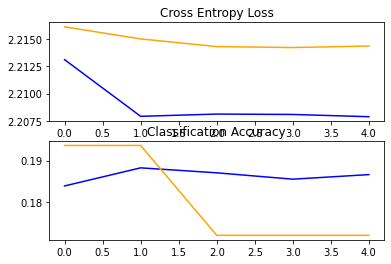

In [ ]:
# plot diagnostic learning curves
# import matplotlib.pyplot as plt
from matplotlib import pyplot
import sys
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# # save plot to file
	# filename = sys.argv[0].split('/')[-1]
	# pyplot.savefig(filename + '_plot.png')
	# pyplot.close()
summarize_diagnostics(history10)

### load model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model
classifier = load_model("/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/D101_new10_model.h5")

In [ ]:
loss_test, accuracy_test = classifier.evaluate(x_train, y_train)
print('Accuracy on train data: {:4.2f}%'.format(accuracy_test * 100))

654/654 [==============================] - 8s 11ms/step - loss: 2.2060 - accuracy: 0.1875
Accuracy on test data: 18.75%


In [ ]:
loss_test, accuracy_test = classifier.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

164/164 [==============================] - 2s 11ms/step - loss: 2.2144 - accuracy: 0.1720
Accuracy on test data: 17.20%


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
prediction_x = classifier.predict(x_test)

In [ ]:
prediction_x

array([[0.17427883, 0.09960442, 0.05315817, ..., 0.06810318, 0.19397989,
        0.07187305],
       [0.17427883, 0.09960442, 0.05315817, ..., 0.06810318, 0.19397989,
        0.07187305],
       [0.17427883, 0.09960442, 0.05315817, ..., 0.06810318, 0.19397989,
        0.07187305],
       ...,
       [0.17427883, 0.09960442, 0.05315817, ..., 0.06810318, 0.19397989,
        0.07187305],
       [0.17427883, 0.09960442, 0.05315817, ..., 0.06810318, 0.19397989,
        0.07187305],
       [0.17427883, 0.09960442, 0.05315817, ..., 0.06810318, 0.19397989,
        0.07187305]], dtype=float32)

In [ ]:
pred_test_labels_new = np.argmax(prediction_x,axis=1)

In [ ]:
pred_test_labels_new

array([8, 8, 8, ..., 8, 8, 8])

In [ ]:
from keras.utils import to_categorical
pred_test_labels = to_categorical(pred_test_labels_new, dtype='float16',num_classes=10)

In [ ]:
pred_test_labels

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float16)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(f"Classification report for VGG16:\n"
      f"{classification_report(y_test, pred_test_labels)}\n")

Classification report for VGG16:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1012
           1       0.00      0.00      0.00       508
           2       0.00      0.00      0.00       309
           3       0.00      0.00      0.00       432
           4       0.00      0.00      0.00       636
           5       0.00      0.00      0.00       345
           6       0.00      0.00      0.00       343
           7       0.00      0.00      0.00       384
           8       0.17      1.00      0.29       899
           9       0.00      0.00      0.00       358

   micro avg       0.17      0.17      0.17      5226
   macro avg       0.02      0.10      0.03      5226
weighted avg       0.03      0.17      0.05      5226
 samples avg       0.17      0.17      0.17      5226




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Experiment with hyperparameter optimization or tuning

In [ ]:
import scipy.io as sio

In [ ]:
data1=sio.loadmat('/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/data.mat')

In [ ]:
x_train1, y_train1, x_test1, y_test1 =data1['x_train'], data1['y_train'], data1['x_test'], data1['y_test']

In [ ]:
x_train1 = (x_train1.astype('float32')-127.5)/127.5

In [ ]:
x_train1.shape

(20902, 64, 64, 3)

In [ ]:
x_test1= (x_test1.astype('float32')-127.5)/127.5

In [ ]:
x_test1.shape

(5226, 64, 64, 3)

In [ ]:
y_train1.shape

(20902, 10)

In [ ]:
y_test1.shape

(5226, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
from keras import regularizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers.core import Lambda
from keras import backend as K
from keras.applications import VGG16

In [ ]:
model = Sequential()
weight_decay = 0.0005

model.add(Conv2D(64, (3, 3), padding='same',input_shape=(64,64,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
activation_48 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
dropout_30 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
activation_49 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 64, 64, 64)       

In [ ]:
SGD_optimizer = optimizers.SGD(lr=0.1, momentum=0.8, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=SGD_optimizer, metrics=['accuracy'])

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False,samplewise_std_normalization=False, zca_whitening=False,  
            rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True)
datagen.fit(x_train1)
def lr_scheduler(epoch):
            return 0.1 * (0.5 ** (epoch/20))


In [ ]:
learningrate_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)
new_classifier=model.fit_generator(datagen.flow(x_train1, y_train1,batch_size=100),steps_per_epoch=x_train1.shape[0] // 100,validation_data=(x_test1,y_test1),epochs=20,callbacks=[learningrate_lr])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
209/209 [==============================] - 43s 204ms/step - loss: 88.5603 - accuracy: 0.1665 - val_loss: 79.9935 - val_accuracy: 0.0660
Epoch 2/20
209/209 [==============================] - 42s 202ms/step - loss: 72.9144 - accuracy: 0.1830 - val_loss: 66.5155 - val_accuracy: 0.1217
Epoch 3/20
209/209 [==============================] - 42s 202ms/step - loss: 60.4262 - accuracy: 0.1853 - val_loss: 55.4344 - val_accuracy: 0.1720
Epoch 4/20
209/209 [==============================] - 42s 203ms/step - loss: 50.2469 - accuracy: 0.1828 - val_loss: 46.3193 - val_accuracy: 0.1936
Epoch 5/20
209/209 [==============================] - 42s 202ms/step - loss: 42.0893 - accuracy: 0.1845 - val_loss: 39.0669 - val_accuracy: 0.0972
Epoch 6/20
209/209 [==============================] - 42s 202ms/step - loss: 35.5495 - accuracy: 0.1849 - val_loss: 32.7435 - val_accuracy: 0.1720
Epoch 7/20
209/209 [==============================] - 42s 203ms/step - loss: 30.2400 - accuracy: 0.1866 - val_loss: 28

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/Model_Optimizer.h5')

In [ ]:
# learningrate_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)
# new_classifier1=model.fit_generator(datagen.flow(x_train1, y_train1,batch_size=100),steps_per_epoch=x_train1.shape[0] // 100,validation_data=(x_test1,y_test1),epochs=200,callbacks=[learningrate_lr])

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/Model_Optimizer1.h5')

In [ ]:
from keras.models import load_model
h = load_model("/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/Model_Optimizer.h5")

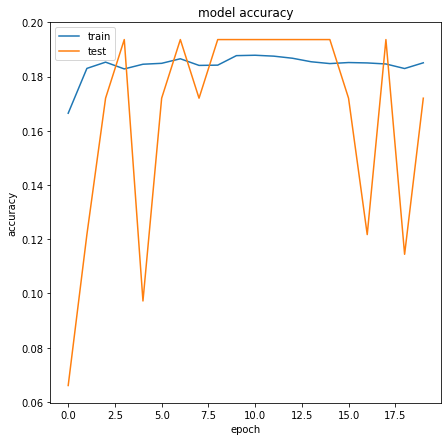

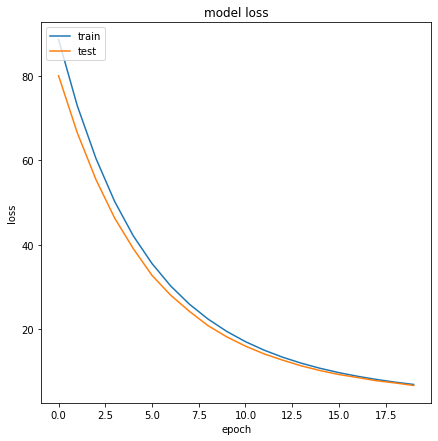

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(new_classifier.history['accuracy'])
plt.plot(new_classifier.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(7, 7))
plt.plot(new_classifier.history['loss'])
plt.plot(new_classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss_test, accuracy_test = h.evaluate(x_train1, y_train1)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

654/654 [==============================] - 12s 18ms/step - loss: 6.6832 - accuracy: 0.1875
Accuracy on test data: 18.75%


In [ ]:
loss_test, accuracy_test = h.evaluate(x_test1, y_test1)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

164/164 [==============================] - 3s 19ms/step - loss: 6.6914 - accuracy: 0.1720
Accuracy on test data: 17.20%


In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/Model_Optimizer2.h5')

In [ ]:
h1 = model.load_weights('/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/Model_Optimizer2.h5')

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
prediction_x1 = h.predict(x_test1)

In [ ]:
prediction_x1

array([[0.17365155, 0.10103554, 0.05140539, ..., 0.06575645, 0.1891569 ,
        0.06969621],
       [0.17365173, 0.10096611, 0.05126649, ..., 0.0657042 , 0.18926787,
        0.06981381],
       [0.17352721, 0.10111292, 0.05146109, ..., 0.06573343, 0.18919471,
        0.06965607],
       ...,
       [0.17360392, 0.10104445, 0.05136991, ..., 0.06571741, 0.18922599,
        0.06973331],
       [0.17391936, 0.10197522, 0.05150979, ..., 0.06586574, 0.18844825,
        0.06951561],
       [0.17347121, 0.10050488, 0.0513737 , ..., 0.065815  , 0.18924342,
        0.06997777]], dtype=float32)

In [ ]:
import numpy as np
pred_test_labels_new1 = np.argmax(prediction_x1,axis=1)

In [ ]:
pred_test_labels_new1

array([8, 8, 8, ..., 8, 8, 8])

In [ ]:
from keras.utils import to_categorical
pred_test_labels1 = to_categorical(pred_test_labels_new1, dtype='float16',num_classes=10)

In [ ]:
pred_test_labels1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float16)

In [ ]:
from sklearn.metrics import accuracy_score
y_prediction= h.predict_classes(x_train1)
y_prediction.shape


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(20902,)

In [ ]:
y_train1.shape

(20902, 10)

In [ ]:
y_train1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(f"Classification report for VGG16:\n"
      f"{classification_report(y_test1, pred_test_labels1)}\n")

Classification report for VGG16:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1012
           1       0.00      0.00      0.00       508
           2       0.00      0.00      0.00       309
           3       0.00      0.00      0.00       432
           4       0.00      0.00      0.00       636
           5       0.00      0.00      0.00       345
           6       0.00      0.00      0.00       343
           7       0.00      0.00      0.00       384
           8       0.17      1.00      0.29       899
           9       0.00      0.00      0.00       358

   micro avg       0.17      0.17      0.17      5226
   macro avg       0.02      0.10      0.03      5226
weighted avg       0.03      0.17      0.05      5226
 samples avg       0.17      0.17      0.17      5226




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Train on DGX and load model here

In [ ]:
from keras.models import load_model
classifier_new = load_model("/content/drive/MyDrive/Colab Notebooks/DAI_Assignment2/Model_Optimizer_new1.h5")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(data1['y_test'].T,y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       560
           1       0.60      0.88      0.71       434
           2       0.68      0.83      0.75       546
           3       0.79      0.92      0.85       634
           4       0.79      0.70      0.74       501
           5       0.88      0.88      0.88       930
           6       0.90      0.73      0.80      1459
           7       0.90      0.92      0.91      1447
           8       0.87      0.70      0.77       559
           9       0.80      0.86      0.83       787

    accuracy                           0.82      7857
   macro avg       0.80      0.81      0.80      7857
weighted avg       0.83      0.82      0.82      7857



# Working with Attack

In [ ]:
!pip install adversarial-robustness-toolbox

     |████████████████████████████████| 890kB 7.8MB/s 
     |████████████████████████████████| 235kB 21.8MB/s 
     |████████████████████████████████| 6.8MB 27.0MB/s 
     |████████████████████████████████| 21.6MB 1.3MB/s 
     |████████████████████████████████| 747kB 33.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
